# 1.1 BUSINESS UNDERSTANDING


### In today’s digital marketplace, companies receive constant feedback from customers through social media platforms such as Twitter. These tweets contain valuable insights into how customers perceive products and brands. However, the volume of data makes it impractical to manually analyze customer sentiments.

## 1.2 Business Problem

### The company wants to understand customer sentiments and opinions expressed in tweets about its products (or competing brands). This will help improve customer experience, brand reputation, and marketing strategies.

## 1.3 Business Goal

### To automatically classify tweets as positive, negative, or neutral sentiments towards products or companies.

## 1.4. Main Objective

### To develop an NLP-based sentiment analysis model that accurately identifies and classifies customer sentiments in tweets related to different products or companies.

## 1.5. Specific Objectives

#### Data Preprocessing:

##### Clean and prepare tweet data by removing noise (hashtags, mentions, URLs, punctuation, etc.) and tokenizing text.

#### Exploratory Data Analysis (EDA):

##### Understand the distribution of sentiments, common keywords, and relationships between tweet text, products, and sentiment labels.

#### Feature Engineering:

##### Convert textual data into numerical representations (e.g., TF-IDF).

#### Model Development:

##### Train and evaluate machine learning or deep learning models (e.g., Logistic Regression, Naïve Bayes, or LSTM) for sentiment classification.

#### Model Evaluation:

##### Use metrics such as accuracy, precision, recall, F1-score, and confusion matrix to evaluate performance.

#### Insight Generation:

##### Identify common themes or issues raised by customers in negative tweets and highlight positive feedback patterns.

# 2.Data Understanding

## 2.1 Data Source
The dataset has been sourced from data.world.
The data contains 9,073 rows and 3 columns

## 2.2 Data Overview
From the classification report, the dataset includes at least four sentiment categories:
1. `I can't tell` — unclear sentiment  
2. `Negative emotion` — dissatisfaction, complaints  
3. `No emotion toward brand or product` — neutral comments  
4. `Positive emotion` — satisfaction  

## 2.3 Observations
- We discovered that the class distribution seems `imbalanced`, with the “No emotion toward brand or product” class having the highest support (1674 samples).
- We saw that the accuracy_score (67.07%) indicates that the model performs moderately well but may struggle with minority classes ("I can't tell").
- We saw that the data included noise or ambiguous labels due to the subjective nature of sentiment.

## Loading the dataset

In [53]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# reading the csv file
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding= "latin1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [55]:
# Columns
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [56]:
df.shape

(9093, 3)

In [57]:
# getting to know the data types
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [58]:
# getting the statistical summary
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


## Data cleaning

In [59]:
# checking for Nan values
df.isna().mean()*100

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

In [60]:
# Drop rows where tweet_text is missing
df = df.dropna(subset=['tweet_text'])

## Cleaning the tweets 

In [61]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    
    # Tokenization and stopword removal
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


In [62]:
# Download the wordnet resource if not already downloaded
import nltk
nltk.download('wordnet')

df['sentiment'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative', 
    'No emotion toward brand or product': 'Neutral',
    "I can't tell": 'Neutral'
})

# Handling missing sentiments 
df = df.dropna(subset=['sentiment'])

# Clean text
df['cleaned_text'] = df['tweet_text'].apply(clean_tweet)



# Remove neutral class
df = df[df['sentiment'] != 'Neutral']



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
# checking for duplicates
duplicates = df[df.duplicated(keep=False)]
duplicates

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,sentiment,cleaned_text
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,Positive,starting around corner hop skip jump good time...
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Positive,counting day plus strong canadian dollar mean ...
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,Negative,noticed dst coming weekend many iphone user ho...
20,Need to buy an iPad2 while I'm in Austin at #s...,iPad,Positive emotion,Positive,need buy ipad im austin sure ill need q austin...
21,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion,Positive,oh god app ipad pure unadulterated awesome eas...
24,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion,Positive,really enjoying change gowalla android looking...
466,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion,Positive,even begin apple win link
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion,Positive,even begin apple win link
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Positive,counting day plus strong canadian dollar mean ...
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion,Positive,really enjoying change gowalla android looking...


In [64]:
# dropping the duplicates
df = df.drop_duplicates()

In [65]:
# checking for duplicates
df.duplicated().sum()

0

### Feature Engineering 

Machine learning models cannot understand raw text, so we need to convert the cleaned tweets into numerical representations.

In this step, we will use the **TF-IDF (Term Frequency–Inverse Document Frequency)** method to transform the textual data into feature vectors.  
TF-IDF assigns higher weights to words that are more unique and important to each tweet, while down-weighting common words like “the” or “and”.

The resulting matrix will serve as input features for our sentiment classification model.


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Defining the variables
X = df['cleaned_text']
y = df['sentiment']


# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['sentiment'])

# TF-IDF
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 3),  # Include trigrams
    min_df=2,
    max_df=0.8,
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


### Handling Class Imbalance

Class imbalance occurs when one sentiment category has far more samples than others.  
This can cause the model to perform poorly on the underrepresented classes.

To address this, we can:

**Check the class distribution.**

**Balance the dataset** 




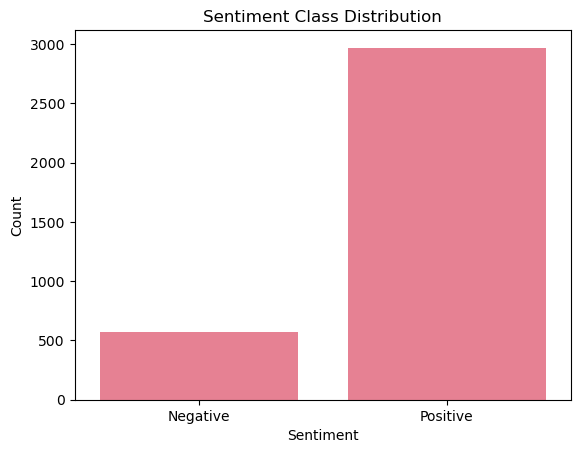

In [67]:
# checking for class imbalance
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the TF-IDF features
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)



### Model Training and Evaluation

In this step, we train and evaluate different machine learning models to classify tweets as **Positive** or **Negative**.  
Each model will be trained on the balanced dataset and evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.
Since there is an imbalance, we will have to use balanced classes for more accurate results


## logistic regression model with balanced classes


Logistic Regression
Accuracy: 0.8375706214689266
Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.61      0.55       114
    Positive       0.92      0.88      0.90       594

    accuracy                           0.84       708
   macro avg       0.71      0.75      0.72       708
weighted avg       0.85      0.84      0.84       708



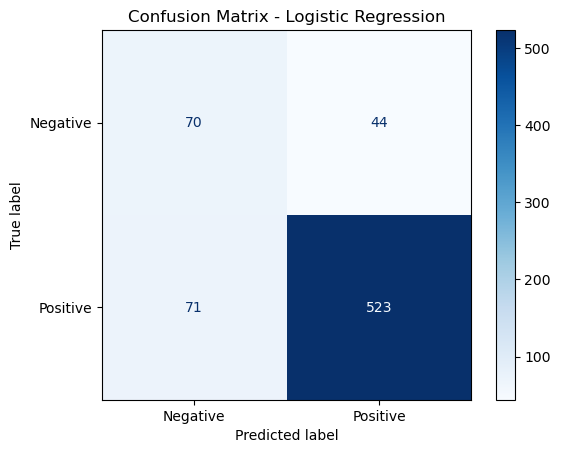

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_reg.predict(X_test_tfidf)

# Evaluate
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_tfidf, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Naive_bayes model

Naive Bayes
Accuracy: 0.7923728813559322
Classification Report:
               precision    recall  f1-score   support

    Negative       0.42      0.73      0.53       114
    Positive       0.94      0.80      0.87       594

    accuracy                           0.79       708
   macro avg       0.68      0.77      0.70       708
weighted avg       0.86      0.79      0.81       708



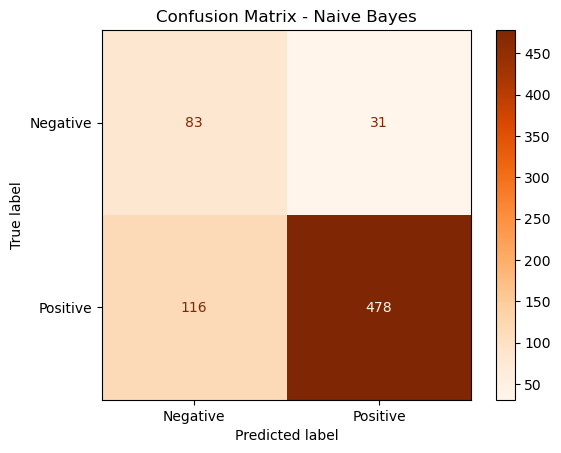

In [70]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test_tfidf, y_test, cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


## Linearsvc model

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

y_pred_svm_balanced = svm.predict(X_test_tfidf)

print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_balanced))


Support Vector Machine
Accuracy: 0.8248587570621468

Classification Report:
               precision    recall  f1-score   support

    Negative       0.46      0.58      0.52       114
    Positive       0.92      0.87      0.89       594

    accuracy                           0.82       708
   macro avg       0.69      0.73      0.70       708
weighted avg       0.84      0.82      0.83       708



# Model Performance Summary

## **Overall Ranking by Accuracy:**
1. **Logistic Regression**: 83.8%
2. **Support Vector Machine (Balanced)**: 82.5%
3. **Naive Bayes**: 79.2%

## **Key Performance Analysis:**

### **Negative Class Performance (Most Important):**
- **Naive Bayes**: Best recall (73%) - catches most negative tweets
- **Logistic Regression**: Balanced performance (61% recall, 50% precision)
- **SVM**: Moderate performance (58% recall, 46% precision)

### **Positive Class Performance:**
- **All models** show strong positive class performance (>87% recall)
- **Logistic Regression** has best balance (88% recall, 92% precision)
- **Naive Bayes** struggles most with positive class (80% recall)

## **Trade-off Analysis:**

**Naive Bayes**: Best at finding negative tweets but makes more false positives
**Logistic Regression**: Most balanced overall performance  
**SVM**: Middle ground but lower negative class precision


In [87]:
import joblib

# Save the SVM model and TF-IDF vectorizer
joblib.dump(log_reg, "log_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']